# Create TFRecords
This is in order to store annotation data in specific format for model training.

In [ ]:
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [ ]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

Cloning into '/content/drive/MyDrive/Tensorflow/scripts'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 1 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), done.


Had to open the generate_tfrecord.py file and edit some code, specifically the function that parses and extracts the information from the .xml files. The problem I was encountering comes from the length of the < object > class if you download from Roboflow is slightly longer than the .xml files created manually with labelImg. The function below is able to handle these differences by measuring the length of the < object > class. For some frustrating reason, there isn't a universally respected order of the < ymin >, < ymax >, < xmin >, < xmax > objects, so some datasets have these in a different order. This function will accommodate these discrepancies.

    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            class_name = member[0].text
            
            if len(member) == 5: # Handling Roboflow XML format
                bbox = member.find('bndbox')
                xmin = int(bbox.find('xmin').text)
                ymin = int(bbox.find('ymin').text)
                xmax = int(bbox.find('xmax').text)
                ymax = int(bbox.find('ymax').text)
            elif len(member) == 6:  # Handling labelImg XML format
                bbox = member.find('bndbox')
                xmin = int(bbox.find('xmin').text)
                ymin = int(bbox.find('ymin').text)
                xmax = int(bbox.find('xmax').text)
                ymax = int(bbox.find('ymax').text)

            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     class_name,
                     xmin,
                     ymin,
                     xmax,
                     ymax
                     )
            xml_list.append(value)

In [ ]:
from PIL import Image
import os
import imghdr
from pathlib import Path

data_dir = "/content/drive/MyDrive/Tensorflow/workspace/images/train2"
image_extensions = [".jpg", ".png", ".webp", ".jpeg"]

for image_path in Path(data_dir).rglob("*"):
  if image_path.suffix.lower() in image_extensions:
    img_type = imghdr.what(image_path)
    if img_type is not None and img_type == "webp":
      img = Image.open(image_path)
      img = img.convert("RGB")  # Convert to RGB mode
      img.save(image_path.with_suffix(".jpg"), "JPEG")
      print(f"Converted {image_path} to JPEG")

      # Find corresponding XML annotation file
      xml_filename = image_path.stem + ".xml"
      xml_path = os.path.join(data_dir, xml_filename)
      if os.path.exists(xml_path):
        shutil.copy(xml_path, image_path.with_suffix(".jpg").with_name(xml_filename))
        print(f"Copied {xml_path} to {image_path.with_suffix('.jpg').with_name(xml_filename)}")
    else:
      img = Image.open(image_path)
      img = img.convert("RGB")  # Convert to RGB mode
      img.save(image_path)
      print(f"Converting {image_path} to JPEG")

      # Find corresponding XML annotation file
      xml_filename = image_path.stem + ".xml"
      xml_path = os.path.join(data_dir, xml_filename)
      if os.path.exists(xml_path):
        shutil.copy(xml_path, image_path.with_name(xml_filename))
        print(f"Copied {xml_path} to {image_path.with_name(xml_filename)}")

In [ ]:
train_folder = '/content/drive/MyDrive/Tensorflow/workspace/images/NEWERtrain2_converted'
label_map = {label['name']: label['id'] for label in labels}
class_counts = {label['name']: 0 for label in labels}
for file in os.listdir(train_folder):
  if file.lower().endswith((".jpg", ".jpeg", ".png")):
    for label in labels:
      class_name = label['name']
      if file.startswith(f"{class_name}"):
        class_counts[class_name] += 1

for label in labels:
  class_name = label['name']
  count = class_counts[class_name]
  print(f"Class: {class_name}, Count: {count}")

Class: birds, Count: 444
Class: car, Count: 285
Class: cliff, Count: 189
Class: cloud, Count: 178
Class: hay-bale, Count: 867
Class: House, Count: 529
Class: Lake, Count: 223
Class: human, Count: 250
Class: tree, Count: 173


In [ ]:
train_folder = '/content/drive/MyDrive/Tensorflow/workspace/images/test2_converted'
label_map = {label['name']: label['id'] for label in labels}
class_counts = {label['name']: 0 for label in labels}
for file in os.listdir(train_folder):
  if file.lower().endswith((".jpg", ".jpeg", ".png")):
    for label in labels:
      class_name = label['name']
      if file.startswith(f"{class_name}"):
        class_counts[class_name] += 1

for label in labels:
  class_name = label['name']
  count = class_counts[class_name]
  print(f"Class: {class_name}, Count: {count}")

Class: birds, Count: 87
Class: car, Count: 43
Class: cliff, Count: 34
Class: cloud, Count: 24
Class: hay-bale, Count: 445
Class: House, Count: 40
Class: Lake, Count: 100
Class: human, Count: 75
Class: tree, Count: 35


In [ ]:
paths['IMAGE_PATH']

'/content/drive/MyDrive/Tensorflow/workspace/images'

In [ ]:
import os

image_dir = "/content/drive/MyDrive/Tensorflow/workspace/images/TOPDOWNtest"
extensions = set()

for filename in os.listdir(image_dir):
  file_extension = os.path.splitext(filename)[1].lower()
  extensions.add(file_extension)
print("Unique file extensions in the directory:")
print(extensions)

Unique file extensions in the directory:
{'.xml', '.jpg'}


In [ ]:
xml_dir = "/content/drive/MyDrive/Tensorflow/workspace/images/TOPDOWNtest"

for xml_file in os.listdir(xml_dir):
  if xml_file.endswith('.xml'):
    xml_path = os.path.join(xml_dir, xml_file)
    tree = ET.parse(xml_path)
    root = tree.getroot()

    for filename_elem in root.iter('filename'):
      new_filename = filename_elem.text.replace('.JPG', '.jpg')
      filename_elem.text = new_filename

    for path_elem in root.iter('path'):
      new_path = path_elem.text.replace('.JPG', '.jpg')
      path_elem.text = new_path

    # Save the updated XML
    tree.write(xml_path)

In [ ]:
xml_dir = "/content/drive/MyDrive/Tensorflow/workspace/images/TOPDOWNtrain"
xml_files_with_tree = []

for xml_file in os.listdir(xml_dir):
  if xml_file.endswith('.xml'):
    xml_path = os.path.join(xml_dir, xml_file)
    tree = ET.parse(xml_path)
    root = tree.getroot()

    for obj in root.findall('object'):
      name_elem = obj.find('name')
        if name_elem is not None and name_elem.text == 'tree':
          xml_files_with_tree.append(xml_file)
          break

print("XML files with 'tree' object class:")
print(xml_files_with_tree)

XML files with 'tree' object class:
[]


In [ ]:
xml_file_path = "/content/drive/MyDrive/Tensorflow/workspace/images/TOPDOWNtrain/housetp_8.xml"
new_object_name = "vegetation"

tree = ET.parse(xml_file_path)
root = tree.getroot()

for obj in root.findall('object'):
  name_elem = obj.find('name')
  if name_elem is not None and name_elem.text == 'tree':
    name_elem.text = new_object_name
    break

# Save the updated XML
tree.write(xml_file_path)

The above functions are simply to check if the right image extensions exist. They also contain functions to make sure the .xml files all contain the right class names.

In [ ]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'TOPDOWNtrain')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')}
#!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'valid')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'valid.record')}
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'TOPDOWNtest')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')}

Successfully created the TFRecord file: /content/drive/MyDrive/Tensorflow/workspace/annotations/train.record
Successfully created the TFRecord file: /content/drive/MyDrive/Tensorflow/workspace/annotations/test.record


In [ ]:
!cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

# pipeline

# Configure pipeline

Configure pipeline of the model for my image files, label mapping, and most importantly transfer learning

In [ ]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [ ]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [ ]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [ ]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:
    proto_str = f.read()
    text_format.Merge(proto_str, pipeline_config)

In [ ]:
/content/drive/MyDrive/Tensorflow/workspace/annotations/test.record

In [ ]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 8
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [ ]:
config_text = text_format.MessageToString(pipeline_config)
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:
    f.write(config_text)

In [ ]:
print("Updated Pipeline Configuration:")
print(config_text)

# XML FILES DEBUGGING

# .XML FILES DEBUGGING

It can be investigated online on sites such as Stack Overflow, that .xml files on Roboflow sometimes contain dubious data, such as bounding boxes being larger than the images that contain them.

It looks like an unknown error is persisting when attempting to train the model. This could be caused by the massive amount of training images present for some classes.

In [ ]:
def count_images_and_annotations(folder_path):
  image_count = 0
  annotation_count = 0

  for root, dirs, files in os.walk(folder_path):
    for file in files:
      if file.lower().endswith(('.jpg', '.jpeg', '.png', '.jfif', '.webp')):
        image_count += 1
      elif file.lower().endswith('.xml'):
        annotation_count += 1

  return image_count, annotation_count

train_folder = '/content/drive/MyDrive/Tensorflow/workspace/images/TOPDOWNtrain'
image_count, annotation_count = count_images_and_annotations(train_folder)

print(f"Number of image files in 'train': {image_count}")
print(f"Number of annotation files in 'train': {annotation_count}")

Number of image files in 'train': 304
Number of annotation files in 'train': 304


In [ ]:
image_folder = '/content/drive/MyDrive/Tensorflow/workspace/images/TOPDOWNtest'
missing_annotations = []

image_files = [file for file in os.listdir(image_folder) if file.lower().endswith(('.jpg', '.png', '.jfif', '.jpeg'))]

for image_file in image_files:
  image_name = os.path.splitext(image_file)[0]
  xml_file = image_name + '.xml'
  xml_path = os.path.join(image_folder, xml_file)
  
  if not os.path.exists(xml_path):
    missing_annotations.append(image_file)

print("Image files without corresponding XML annotations:")
for missing_file in missing_annotations:
  print(missing_file)

print(f"Total number of missing annotations: {len(missing_annotations)}")

Image files without corresponding XML annotations:
Total number of missing annotations: 0


On a side note, it looks like two image files do not sport related annotation files in the training set.

In [ ]:
image_folder = '/content/drive/MyDrive/Tensorflow/workspace/images/train2'

images_to_delete = ['cloud63.jpg', 'cloud94.jpg']

for image_to_delete in images_to_delete:
  image_path = os.path.join(image_folder, image_to_delete)
  if os.path.exists(image_path):
    os.remove(image_path)
    print(f"Deleted image: {image_to_delete}")
  else:
    print(f"Image not found: {image_to_delete}")

Deleted image: cloud63.jpg
Deleted image: cloud94.jpg


The below function checks for any outliers in the .xml annotation data.

In [ ]:
def check_xml_annotations(xml_folder):
  xml_files = [f for f in os.listdir(xml_folder) if f.endswith('.xml')]
  problematic_files = []
  for xml_file in xml_files:
    xml_path = os.path.join(xml_folder, xml_file)
    tree = ET.parse(xml_path)
    root = tree.getroot()

    width = int(root.find('size/width').text)
    height = int(root.find('size/height').text)

    for obj in root.findall('object'):
      bbox = obj.find('bndbox')
      xmin = int(bbox.find('xmin').text)
      ymin = int(bbox.find('ymin').text)
      xmax = int(bbox.find('xmax').text)
      ymax = int(bbox.find('ymax').text)

      if xmin < 0 or ymin < 0 or xmax > width or ymax > height:
        problematic_files.append(xml_file)
        break

  return problematic_files

In [ ]:
xml_folder = '/content/drive/MyDrive/Tensorflow/workspace/images/TOPDOWNtest'
problematic_files = check_xml_annotations(xml_folder)

if len(problematic_files) == 0:
    print("No problematic annotations found.")
else:
    print("Problematic annotations found in the following files:")
    for file in problematic_files:
        print(file)

No problematic annotations found.


There are loads of problematic .xml files which contain such issues as bounding boxes stretching from 'xmin=1' to 'xmin=641', when the image is only 640 wide, for the image below. It coould be seen this occurs in cases where the object carries on off the screen, and annotated as such, and later when the image is compressed, the pixel x-value is calculated to be off of the screen. As seen on Stack Overflow, it is necessary to delete these .xml files along with related images if you want to train the model correctly. 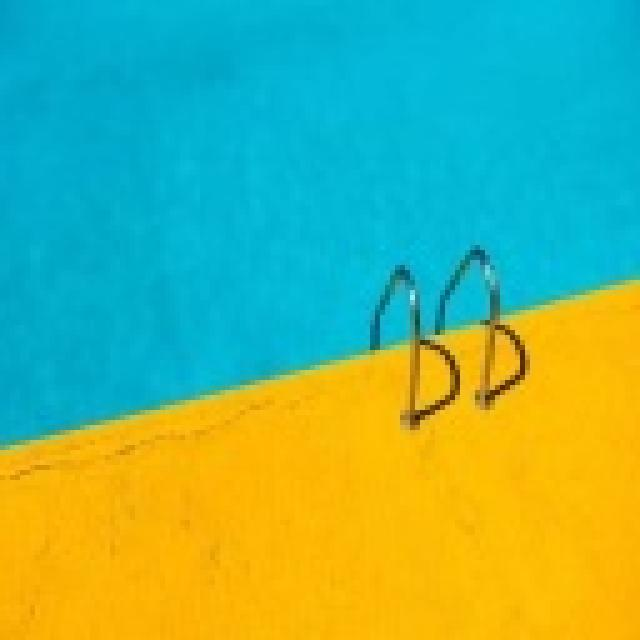

Now I will delete problematic pairs of image/xml files found in the training and testing sets.

In [ ]:
def delete_problematic_data(xml_folder, problematic_files):
  for xml_file in problematic_files:
    xml_path = os.path.join(xml_folder, xml_file)
    image_path = os.path.join('/content/drive/MyDrive/Tensorflow/workspace/images/train2', xml_file.replace('.xml', '.jpg'))
    if os.path.exists(xml_path):
      os.remove(xml_path)
      print(f"Deleted XML file: {xml_file}")

    if os.path.exists(image_path):
      os.remove(image_path)
      print(f"Deleted image file: {xml_file.replace('.xml', '.jpg')}")

xml_folder = '/content/drive/MyDrive/Tensorflow/workspace/images/train2'
problematic_files = problematic_files

delete_problematic_data(xml_folder, problematic_files)

Now checking the amount of images in train:

In [ ]:
def count_images_and_annotations(folder_path):
    image_count = 0
    annotation_count = 0

    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.jfif')):
                image_count += 1
            elif file.lower().endswith('.xml'):
                annotation_count += 1

    return image_count, annotation_count

train_folder = '/content/drive/MyDrive/Tensorflow/workspace/images/train'
image_count, annotation_count = count_images_and_annotations(train_folder)

print(f"Number of image files in 'train': {image_count}")
print(f"Number of annotation files in 'train': {annotation_count}")

Number of image files in 'train': 5423
Number of annotation files in 'train': 5423


There are about 1,000 less images in the training set, and then after performing the same with the testing set:

In [ ]:
def count_images_and_annotations(folder_path):
    image_count = 0
    annotation_count = 0

    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.jfif')):
                image_count += 1
            elif file.lower().endswith('.xml'):
                annotation_count += 1

    return image_count, annotation_count

test_folder = '/content/drive/MyDrive/Tensorflow/workspace/images/test'
image_count, annotation_count = count_images_and_annotations(test_folder)

print(f"Number of image files in 'test': {image_count}")
print(f"Number of annotation files in 'test': {annotation_count}")

Number of image files in 'test': 1845
Number of annotation files in 'test': 1845


In [ ]:
import os
from collections import defaultdict

train_folder = '/content/drive/MyDrive/Tensorflow/workspace/images/train/'
class_counts = defaultdict(int)

# Loop through all XML files in the train folder
for xml_file in os.listdir(train_folder):
  if xml_file.endswith('.xml'):
    xml_path = os.path.join(train_folder, xml_file)
    with open(xml_path, 'r') as f:
      lines = f.readlines()
      for line in lines:
        if '<name>' in line:
          class_name = line.strip().split('<name>')[1].split('</name>')[0]
          class_counts[class_name] += 1

# Print the counts for each object class
for class_name, count in class_counts.items():
  print(f"Class: {class_name}, Count: {count}")

Class: birds, Count: 459
Class: car, Count: 363
Class: cliff, Count: 343
Class: pool, Count: 421
Class: tree, Count: 632
Class: cloud, Count: 815
Class: hay-bale, Count: 3615
Class: human, Count: 8014
Class: House, Count: 529
Class: Lake, Count: 220


Although the number of images belonging to each class is uneven, particularly with 'human' and 'hay-bale', let's first see if the model is working after deleting these problematic files.

The problem still persists, and after looking online some more, it appears some .xml files can also contain negative values for width and height, or have bounding boxes with area 0. The following function will go over all .xml files again and check both the training and test set for this problem:

In [ ]:
def check_xml_annotations(xml_folder):
  xml_files = [f for f in os.listdir(xml_folder) if f.endswith('.xml')]

  problematic_files = []

  for xml_file in xml_files:
    xml_path = os.path.join(xml_folder, xml_file)
    tree = ET.parse(xml_path)
    root = tree.getroot()

    width = int(root.find('size/width').text)
    height = int(root.find('size/height').text)

    for obj in root.findall('object'):
      bbox = obj.find('bndbox')
      xmin = int(bbox.find('xmin').text)
      ymin = int(bbox.find('ymin').text)
      xmax = int(bbox.find('xmax').text)
      ymax = int(bbox.find('ymax').text)

      if xmin < 0 or ymin < 0 or xmax < 0 or ymax < 0 or xmin > xmax or ymin > ymax:
        problematic_files.append(xml_file)
        break

      box_width = xmax - xmin
      box_height = ymax - ymin
      if box_width <= 0 or box_height <= 0:
        problematic_files.append(xml_file)
        break

  return problematic_files

In [ ]:
xml_folder = '/content/drive/MyDrive/Tensorflow/workspace/images/TOPDOWNtest'
problematic_files = check_xml_annotations(xml_folder)

if len(problematic_files) == 0:
    print("No problematic annotations found.")
else:
    print("Problematic annotations found in the following files:")
    for file in problematic_files:
        print(file)

No problematic annotations found.


Let's see if this has had any effect on the command to train the Tensorflow model above.

On second thought, the pre-processing function built-in to the model may be encountering issues with certain resolutions in the training folder:

In [ ]:
def get_unique_image_resolutions(image_folder):
  unique_resolutions = set()
  for file in os.listdir(image_folder):
    if file.lower().endswith(('.jpg', '.png', '.jfif', '.jpeg')):
      image_path = os.path.join(image_folder, file)
        try:
          img = Image.open(image_path)
          width, height = img.size
          unique_resolutions.add((width, height))
        except Exception as e:
          print(f"Error processing image: {image_path}")
          print(f"Error message: {str(e)}")

  return unique_resolutions

In [ ]:
image_folder = '/content/drive/MyDrive/Tensorflow/workspace/images/train'
resolutions = get_unique_image_resolutions(image_folder)

print("Unique image resolutions:")
for width, height in resolutions:
    print(f"{width} x {height}")

In [ ]:
original_folder = '/content/drive/MyDrive/Tensorflow/workspace/images/train'

# Path to new folder to store selected images
new_folder = '/content/drive/MyDrive/Tensorflow/workspace/images/train_small'

In [ ]:
original_folder = '/content/drive/MyDrive/Tensorflow/workspace/images/test'

# Path to new folder to store selected images
new_folder = '/content/drive/MyDrive/Tensorflow/workspace/images/test_small'
if not os.path.exists(new_folder):
    os.makedirs(new_folder)

In [ ]:
labels = [{'name':'birds', 'id':1}, {'name':'car', 'id':2}, {'name':'cliff', 'id':3}, {'name':'cloud', 'id':4}, {'name':'hay-bale', 'id':5}, {'name':'House', 'id':6}, {'name':'Lake', 'id':7}, {'name':'human', 'id':8}, {'name':'pool', 'id':9}, {'name':'tree', 'id':10}]

In [ ]:
num_images_per_class = 2

In [ ]:
import random
import shutil
# Iterate through each class
for class_info in labels:
  class_name = class_info['name']

  # Get list of image files for this class
  class_image_files = [f for f in os.listdir(original_folder) if f.startswith(class_name) and f.endswith('.jpg')]

  # Shuffle the list of image files
  random.shuffle(class_image_files)

  # Select the first num_images_per_class
  selected_image_files = class_image_files[:num_images_per_class]

  # Copy selected image files and corresponding XML files to the new folder
  for image_file in selected_image_files:
    src_image_path = os.path.join(original_folder, image_file)
    dst_image_path = os.path.join(new_folder, image_file)
    shutil.copy(src_image_path, dst_image_path)
    # Get corresponding XML file
    xml_file = image_file.replace('.jpg', '.xml')
    src_xml_path = os.path.join(original_folder, xml_file)
    dst_xml_path = os.path.join(new_folder, xml_file)
    shutil.copy(src_xml_path, dst_xml_path)

print("Images and XML files copied to new folder.")

Images and XML files copied to new folder.


Nope, no negative values or boxes with zero area. The issue now must surely be the number of images, or, if not, there's an issue with one of the images collected via Roboflow. The only thing left to do now, is to collect all the images manually. This shouldn't be a pain as the video by Nicholas Renotte has explained that a much smaller number of images than I first thought is necessary for transfer learning. Hopefully, I can cover both possible issues at the same time by doing this relatively simple task. However, still an annoyance that I can't seem to rely on people online!

# MODEL TRAINING

# MODEL TRAINING!

In [ ]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [ ]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=5000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [ ]:
print(command)

python /content/drive/MyDrive/Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=/content/drive/MyDrive/Tensorflow/workspace/models/topdown --pipeline_config_path=/content/drive/MyDrive/Tensorflow/workspace/models/topdown/pipeline.config --num_train_steps=5000


In [ ]:
!{command}

2023-08-24 17:24:01.950181: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-08-24 17:24:06.185091: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0824 17:24:06.186330 134179689795584 mirrored_strategy.py:419] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 5000
I0824 17:24:06.216226 134179689795584 config_util.py:552] Maybe overwriting train_steps: 5000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0824 17:24:06.216558 134179689795584 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W0824 17:24:06.429432 134179689795584 dep

# REFLECTION

# Reflection of pre-processing and finally getting model to train

So, after completing several pre-processing steps, the model can finally train with a subset of images: 10 per class for training, and 2 per class for testing.
I also had to:
* change the generate_tfrecord.py script in **'Create TFRecords'**, to compensate for the unexpected change in order displayed in .xml bounding box co-ordinates. This should be fine now that I have specifically assigned the values xmin, ymin etc. to the names which appear in .xml classes, and not based on their position... The change in position meant that some values were wrongly assigned which resulted in negative areas.
* convert some images to JPEG format in **'Processing the pixel values to help image processing'**. These images in question were collected by me using Google, and thought none the wiser as to how formats are so deadly to Tensorflow image processing modules. It turns out a WEBP image format is not supported, so this resulted in having to convert each image to JPEG, if it wasn't in this format already. These images were collected in a smaller subset along with relevant .xml files, as this issue seemed to be a memory usage issue at the time; this is not so, at least for about 100 images.
* delete any images in the pool that didn't have an assigned .xml file in **'.XML FILES DEBUGGING'**.
                 \/ \/ \/ \/ \/ \/ \/ \/ \/ \/ \/ \/ \/ \/    
* and finally, <u>**creating multiple backups of my images**</u> <-- very important.

                 ^^ ^^ ^^ ^^ ^^ ^^ ^^ ^^ ^^ ^^ ^^ ^^ ^^

P.S. My task now is to create a precise model now, while remembering I have changed certain values in the pipeline.config file, to reflect the smaller subset of data.